Modified from
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Training an image classifier
We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

Loading and normalizing CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [2]:
import torch
net = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet56", pretrained=True)

Using cache found in /Users/maomao/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [3]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
transform = transforms.Compose(
    [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
     transforms.Normalize(norm_mean, norm_std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog   car  deer  deer


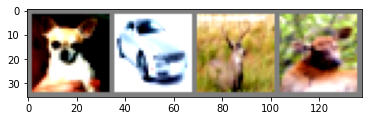

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  dog  deer   car truck


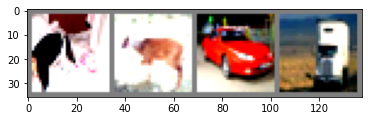

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## CNN training

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.823
[1,  6000] loss: 1.669
[1,  8000] loss: 1.574
[1, 10000] loss: 1.534
[1, 12000] loss: 1.457
[2,  2000] loss: 1.380
[2,  4000] loss: 1.340
[2,  6000] loss: 1.328
[2,  8000] loss: 1.291
[2, 10000] loss: 1.271
[2, 12000] loss: 1.260
[3,  2000] loss: 1.195
[3,  4000] loss: 1.188
[3,  6000] loss: 1.172
[3,  8000] loss: 1.159
[3, 10000] loss: 1.160
[3, 12000] loss: 1.150
[4,  2000] loss: 1.053
[4,  4000] loss: 1.093
[4,  6000] loss: 1.077
[4,  8000] loss: 1.070
[4, 10000] loss: 1.075
[4, 12000] loss: 1.090
[5,  2000] loss: 1.008
[5,  4000] loss: 0.983
[5,  6000] loss: 0.990
[5,  8000] loss: 1.016
[5, 10000] loss: 1.016
[5, 12000] loss: 1.026
[6,  2000] loss: 0.915
[6,  4000] loss: 0.945
[6,  6000] loss: 0.930
[6,  8000] loss: 0.978
[6, 10000] loss: 0.948
[6, 12000] loss: 0.996
[7,  2000] loss: 0.881
[7,  4000] loss: 0.887
[7,  6000] loss: 0.910
[7,  8000] loss: 0.916
[7, 10000] loss: 0.922
[7, 12000] loss: 0.912
[8,  2000] loss: 0.810
[8,  4000] 

In [41]:
PATH = './cifar_cnn.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


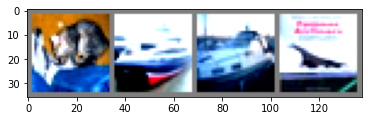

In [42]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [43]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [44]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship   car


In [45]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = (100 * correct / total)
print('Accuracy of the network on the 10000 test images: %d %%' % test_accuracy)

Accuracy of the network on the 10000 test images: 56 %


In [47]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 82 %
Accuracy of  bird : 39 %
Accuracy of   cat : 29 %
Accuracy of  deer : 24 %
Accuracy of   dog : 48 %
Accuracy of  frog : 53 %
Accuracy of horse : 74 %
Accuracy of  ship : 65 %
Accuracy of truck : 75 %


# FGSM attack

$$\begin{align}perturbed\_image = image + epsilon*sign(data\_grad) = x + \epsilon * sign(\nabla_{x} J(\mathbf{\theta}, \mathbf{x}, y))\end{align}$$

In [8]:
# https://github.com/catherine0422/CIFAR10-VGG19-FGSM-PGD/blob/main/.ipynb_checkpoints/simple%20adversarial%20attacks%20on%20CIFAR10-checkpoint.ipynb
def fgsm_attack(image, epsilon, data_grad):
    #d = epsilon * data_grad
    #print("When epsilon = %d, L-infinity norm = %d", epsilon, np.max(d))
    if epsilon == 0:
        return image
    else:
        image = unnormalize(image)
        pertubed_image = image + epsilon*data_grad.sign()
        pertubed_image = torch.clamp(pertubed_image,0,1)
        pertubed_image = transforms.Normalize(mean = norm_mean, std = norm_std)(pertubed_image)
    return pertubed_image.float()

def fgsm_test(model, data_loader, epsilon, n_examples):
  '''
  input: 
    data_loader: data set, batch size = 1
    epsilon: parameter to perform fgsm attack
  return:
    final_acc: accuracy of the model on classifying adversarial examples created based on datas
    adv_examples: n_examples examples of successed adversrial examples
  '''
  print('Epsilon:', epsilon)
  print('-' * 10)
  correct = 0
  adv_examples = []
  # Loop over all examples in data set, data shape: (C, H, W)
  for i, (data, target) in enumerate(data_loader):

      if i>0 and i%1000 == 0:
        current_acc = correct/i
        print(f'Test Accuracy = {current_acc:.4f} [{i:>5d} / {len(data_loader):>5d}]')

      # Send the data and label to the device
      data, target = data.to(device), target.to(device)

      # Set requires_grad attribute of tensor. Important for Attack
      data.requires_grad = True

      # Forward pass the data through the model
      output = model(data)
      init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      # If the initial prediction is wrong, dont bother attacking, just move on
      if init_pred.item() != target.item():
          continue

      # Calculate the loss
      loss = F.nll_loss(output, target)

      # Zero all existing gradients
      model.zero_grad()

      # Calculate gradients of model in backward pass
      loss.backward()

      # Collect datagrad
#      data_grad = data.grad.data
#      print(torch.max(data_grad), "\n", data_grad)

      # Call FGSM Attack
      perturbed_data = fgsm_attack(data, epsilon, data_grad)

      # Re-classify the perturbed image
      output = model(perturbed_data)

      # Check for success
      final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      if final_pred.item() == target.item():
          correct += 1
          # Special case for saving 0 epsilon examples
          if (epsilon == 0) and (len(adv_examples) < n_examples):
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      else:
          # Save some adv examples for visualization later
          if len(adv_examples) < n_examples:
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      


  # Calculate final accuracy for this epsilon
  final_acc = correct/float(len(data_loader))
  print("Epsilon: {}\tTest Accuracy = {} / {} = {} \n".format(epsilon, correct, len(data_loader), final_acc))

  # Return the accuracy and an adversarial example
  return final_acc, adv_examples


In [9]:
def unnormalize(img, mean = np.array(norm_mean), std = np.array(norm_std)):
  '''
   unnormalize the image that has been normalized with mean and std
  '''
  inverse_mean = - mean/std
  inverse_std = 1/std
  img = transforms.Normalize(mean=-mean/std, std=1/std)(img)
  return img

In [10]:
test_loader_1=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True)
epsilons = [0.1,0.2,0.3]
n_examples = 5
examples = []
accuracies = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(net, test_loader_1, eps, n_examples)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0.1
----------


NameError: name 'data_grad' is not defined

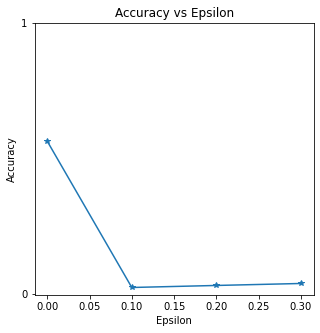

In [55]:
plt.figure(figsize=(5,5))
plt.plot([0] + epsilons, [test_accuracy/100] + accuracies, "*-")
plt.yticks(np.arange(0.0, 1.1, step=1))
plt.xticks(np.arange(0.0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [11]:
def ax_imshow(ax, img, label):
    img = unnormalize(img)     # unnormalize
    img = np.clip(img, 0., 1.)
    ax.set_xticks([])
    ax.set_yticks([])
    img = np.transpose(img, (1,2,0))
    ax.imshow(img)
    ax.set_title(classes[label])


for i,epsilon in enumerate(epsilons):
  plt.figure(figsize=(2,12))
  fig, axs = plt.subplots(2, n_examples)
  fig.suptitle("Epsilon =  {}".format(epsilon))
  for j in range(len(examples[i])): 
    orig,adv,adv_ex,ori_ex = examples[i][j]
    ax1 = axs[0, j]
    ax2 = axs[1, j]
    ax_imshow(ax2, adv_ex, adv)
    ax_imshow(ax1, ori_ex, orig)
    if j == 0:
      ax1.set_ylabel('Original', fontsize=14)
      ax2.set_ylabel('Adversarial', fontsize=14)
    plt.tight_layout()

NameError: name 'epsilons' is not defined

In [1]:
print(adv.shape)

NameError: name 'adv' is not defined

# PGD Attack

$$x^{t+1} = \prod_{x+s} (x^t + \alpha sgn(\nabla_xL(\theta,x,y)))$$

In [57]:

# inspired by https://github.com/Harry24k/PGD-pytorch/blob/master/PGD.ipynb
def pgd_attack(model, image, label, eps, alpha, iters) :

    loss = nn.CrossEntropyLoss()
        
    ori_image = unnormalize(image.data)
        
    for i in range(iters) :    
        image.requires_grad = True
        output = model(image)

        model.zero_grad()
        cost = loss(output, label).to(device)
        cost.backward()

        data_grad = image.grad.data
        image = unnormalize(image)
        adv_image = image + alpha*data_grad.sign()
        eta = adv_image - ori_image
        eta_clip = torch.clamp(eta, min=-eps, max=eps)
        image = torch.clamp(ori_image + eta_clip, min=0, max=1)
        image = transforms.Normalize(mean = norm_mean, std = norm_std)(image).detach()
            
    return image
def pgd_test(model, data_loader, n_examples, eps=0.3, alpha=2/255, iters=7):
  '''
  input: 
    data_loader: data set, batch size = 1
    epsilon: parameter to perform fgsm attack
  return:
    final_acc: accuracy of the model on classifying adversarial examples created based on datas
    adv_examples: n_examples examples of successed adversrial examples
  '''
  correct = 0
  adv_examples = []
  # Loop over all examples in data set, data shape: (C, H, W)
  for i, (data, target) in enumerate(data_loader):

      if i>0 and i%400 == 0:
        current_acc = correct/i
        print(f'Test Accuracy = {current_acc:.4f} [{i:>5d} / {len(data_loader):>5d}]')

      # Send the data and label to the device
      data, target = data.to(device), target.to(device)

      # Forward pass the data through the model
      output = model(data)
      init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      # If the initial prediction is wrong, dont bother attacking, just move on
      if init_pred.item() != target.item():
          continue

      # Call PGD Attack
      perturbed_data = pgd_attack(model, data, target, eps, alpha, iters)

      # Re-classify the perturbed image
      output = model(perturbed_data)

      # Check for success
      final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      if final_pred.item() == target.item():
          correct += 1
      else:
          # Save some adv examples for visualization later
          if len(adv_examples) < n_examples:
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      

  # Calculate final accuracy for this epsilon
  final_acc = correct/float(len(data_loader))
  print("Epsilon: {}, Alpha: {}, Iterations:{} \n Test Accuracy = {} / {} = {}".format(eps,alpha,iters, correct, len(data_loader), final_acc))

  # Return the accuracy and an adversarial example
  return final_acc, adv_examples

In [59]:
acc_pgd, ex_pgd = pgd_test(net, test_loader_1, n_examples = 5)

Test Accuracy = 0.0750 [  400 / 10000]
Test Accuracy = 0.0712 [  800 / 10000]
Test Accuracy = 0.0683 [ 1200 / 10000]
Test Accuracy = 0.0712 [ 1600 / 10000]
Test Accuracy = 0.0725 [ 2000 / 10000]
Test Accuracy = 0.0746 [ 2400 / 10000]
Test Accuracy = 0.0782 [ 2800 / 10000]
Test Accuracy = 0.0750 [ 3200 / 10000]
Test Accuracy = 0.0772 [ 3600 / 10000]
Test Accuracy = 0.0783 [ 4000 / 10000]
Test Accuracy = 0.0782 [ 4400 / 10000]
Test Accuracy = 0.0773 [ 4800 / 10000]
Test Accuracy = 0.0763 [ 5200 / 10000]
Test Accuracy = 0.0764 [ 5600 / 10000]
Test Accuracy = 0.0757 [ 6000 / 10000]
Test Accuracy = 0.0759 [ 6400 / 10000]
Test Accuracy = 0.0741 [ 6800 / 10000]
Test Accuracy = 0.0736 [ 7200 / 10000]
Test Accuracy = 0.0728 [ 7600 / 10000]
Test Accuracy = 0.0729 [ 8000 / 10000]
Test Accuracy = 0.0743 [ 8400 / 10000]
Test Accuracy = 0.0736 [ 8800 / 10000]
Test Accuracy = 0.0741 [ 9200 / 10000]
Test Accuracy = 0.0742 [ 9600 / 10000]
Epsilon: 0.3, Alpha: 0.00784313725490196, Iterations:7 
 Test Ac

<Figure size 144x864 with 0 Axes>

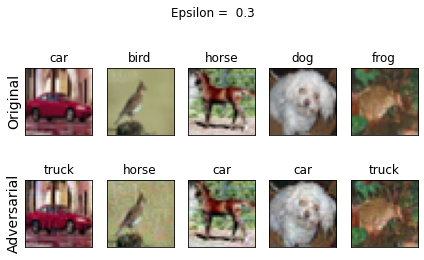

In [60]:
plt.figure(figsize=(2,12))
fig, axs = plt.subplots(2, 5)
fig.suptitle("Epsilon =  {}".format(0.3))
for j in range(len(ex_pgd)): 
  orig,adv,adv_ex,ori_ex = ex_pgd[j]
  ax1 = axs[0, j]
  ax2 = axs[1, j]
  ax_imshow(ax2, adv_ex, adv)
  ax_imshow(ax1, ori_ex, orig)
  if j == 0:
    ax1.set_ylabel('Original', fontsize=14)
    ax2.set_ylabel('Adversarial', fontsize=14)
  plt.tight_layout()

# Random Natural Noise

## Add Random Natural Noise to original images

In [12]:
noise = torch.randn(1, 3, 32, 32)
print(noise)

tensor([[[[ 0.1772,  0.5135, -0.1275,  ...,  0.9678,  1.3964,  1.1741],
          [-0.7338, -1.5877, -0.8128,  ..., -0.8864,  0.9691,  0.6920],
          [-0.3074,  1.6454,  0.5916,  ..., -1.4568, -0.0357,  0.0272],
          ...,
          [-0.9043, -2.4260,  0.1048,  ...,  2.4329,  0.5232, -0.6049],
          [ 1.5349, -0.5076, -1.2158,  ...,  0.7233, -0.4358, -0.7938],
          [ 1.7004, -0.6015,  0.7407,  ...,  1.3432, -0.1643,  0.5221]],

         [[-0.6928, -0.8101,  1.3676,  ..., -2.0678,  0.4824,  0.5644],
          [ 0.3405,  0.2654,  0.4651,  ...,  0.3133, -2.2642,  0.3558],
          [ 1.4519,  1.0341, -0.8651,  ...,  0.9910, -0.2097, -0.3319],
          ...,
          [-1.0476, -0.0031,  0.4632,  ...,  0.8957, -0.2917, -0.9857],
          [-1.5195,  0.5115, -0.3729,  ...,  0.0665, -2.0578, -0.8035],
          [-1.3995, -1.3486, -0.3211,  ..., -1.2726,  0.6550, -0.4535]],

         [[-0.3157,  1.7143, -0.0722,  ...,  0.4252,  1.4597,  0.4176],
          [ 0.8429, -0.1733, -

In [15]:
test_loader_1=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True)
def add_noise(model, image, label, eps, alpha) :
    ori_image = unnormalize(image.data)
 
    image.requires_grad = True
    output = model(image)

    model.zero_grad()
    
    noise = torch.randn(1, 3, 32, 32)
    #print(noise)
    data_noise = noise
    image = unnormalize(image)
    noised_image = image + alpha*noise
    eta = noised_image - ori_image
    eta_clip = torch.clamp(eta, min=-eps, max=eps)
    image = torch.clamp(ori_image + eta_clip, min=0, max=1)
    image = transforms.Normalize(mean = norm_mean, std = norm_std)(image).detach()
            
    return image
def noise_test(model, data_loader, n_examples, eps=0.3, alpha=2/255):
  '''
  input: 
    data_loader: data set, batch size = 1
    epsilon: parameter to perform fgsm attack
  return:
    final_acc: accuracy of the model on classifying adversarial examples created based on datas
    adv_examples: n_examples examples of successed adversrial examples
  '''
  correct = 0
  noise_examples = []
  # Loop over all examples in data set, data shape: (C, H, W)
  for i, (data, target) in enumerate(data_loader):

      if i>0 and i%400 == 0:
        current_acc = correct/i
        print(f'Test Accuracy = {current_acc:.4f} [{i:>5d} / {len(data_loader):>5d}]')

      # Send the data and label to the device
      data, target = data.to(device), target.to(device)

      # Forward pass the data through the model
      output = model(data)
      init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      # If the initial prediction is wrong, dont bother attacking, just move on
      if init_pred.item() != target.item():
          continue

      # Call PGD Attack
      perturbed_data = add_noise(model, data, target, eps, alpha)

      # Re-classify the perturbed image
      output = model(perturbed_data)

      # Check for success
      final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      if final_pred.item() == target.item():
          correct += 1
      else:
          # Save some adv examples for visualization later
          if len(noise_examples) < n_examples:
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              noise_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      

  # Calculate final accuracy for this epsilon
  final_acc = correct/float(len(data_loader))
  print("Epsilon: {}, Alpha: {} \n Test Accuracy = {} / {} = {}".format(eps,alpha, correct, len(data_loader), final_acc))

  # Return the accuracy and an adversarial example
  return final_acc, noise_examples

In [18]:
acc_noise, ex_noise = noise_test(net, test_loader_1, n_examples = 5)

Test Accuracy = 0.2125 [  400 / 10000]
Test Accuracy = 0.2162 [  800 / 10000]
Test Accuracy = 0.2158 [ 1200 / 10000]
Test Accuracy = 0.2213 [ 1600 / 10000]
Test Accuracy = 0.2220 [ 2000 / 10000]
Test Accuracy = 0.2196 [ 2400 / 10000]
Test Accuracy = 0.2236 [ 2800 / 10000]
Test Accuracy = 0.2213 [ 3200 / 10000]
Test Accuracy = 0.2197 [ 3600 / 10000]
Test Accuracy = 0.2175 [ 4000 / 10000]
Test Accuracy = 0.2180 [ 4400 / 10000]
Test Accuracy = 0.2223 [ 4800 / 10000]
Test Accuracy = 0.2262 [ 5200 / 10000]
Test Accuracy = 0.2280 [ 5600 / 10000]
Test Accuracy = 0.2287 [ 6000 / 10000]
Test Accuracy = 0.2283 [ 6400 / 10000]
Test Accuracy = 0.2262 [ 6800 / 10000]
Test Accuracy = 0.2235 [ 7200 / 10000]
Test Accuracy = 0.2246 [ 7600 / 10000]
Test Accuracy = 0.2244 [ 8000 / 10000]
Test Accuracy = 0.2232 [ 8400 / 10000]
Test Accuracy = 0.2240 [ 8800 / 10000]
Test Accuracy = 0.2226 [ 9200 / 10000]
Test Accuracy = 0.2215 [ 9600 / 10000]
Epsilon: 0.3, Alpha: 0.00784313725490196 
 Test Accuracy = 2205 

<Figure size 144x864 with 0 Axes>

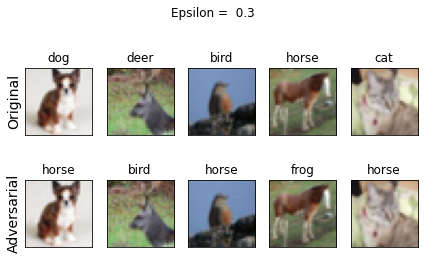

In [117]:
plt.figure(figsize=(2,12))
fig, axs = plt.subplots(2, 5)
fig.suptitle("Epsilon =  {}".format(0.3))
for j in range(len(ex_pgd)): 
  orig,noise,noise_ex,ori_ex = ex_noise[j]
  ax1 = axs[0, j]
  ax2 = axs[1, j]
  ax_imshow(ax2, noise_ex, noise)
  ax_imshow(ax1, ori_ex, orig)
  if j == 0:
    ax1.set_ylabel('Original', fontsize=14)
    ax2.set_ylabel('Adversarial', fontsize=14)
  plt.tight_layout()

## Add Random Natural Noise to perturbed images

In [122]:
def pgd_noise_test(model, data_loader, n_examples, eps=0.3, alpha=2/255, iters=7):
  '''
  input: 
    data_loader: data set, batch size = 1
    epsilon: parameter to perform fgsm attack
  return:
    final_acc: accuracy of the model on classifying adversarial examples created based on datas
    adv_examples: n_examples examples of successed adversrial examples
  '''
  correct = 0
  adv_examples = []
  # Loop over all examples in data set, data shape: (C, H, W)
  for i, (data, target) in enumerate(data_loader):

      if i>0 and i%400 == 0:
        current_acc = correct/i
        print(f'Test Accuracy = {current_acc:.4f} [{i:>5d} / {len(data_loader):>5d}]')

      # Send the data and label to the device
      data, target = data.to(device), target.to(device)

      # Forward pass the data through the model
      output = model(data)
      init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      # If the initial prediction is wrong, dont bother attacking, just move on
      if init_pred.item() != target.item():
          continue

      # Call PGD Attack
      perturbed_data = add_noise(model,pgd_attack(model, data, target, eps, alpha, iters),target, 1, 1)

      # Re-classify the perturbed image
      output = model(perturbed_data)

      # Check for success
      final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      if final_pred.item() == target.item():
          correct += 1
      else:
          # Save some adv examples for visualization later
          if len(adv_examples) < n_examples:
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      

  # Calculate final accuracy for this epsilon
  final_acc = correct/float(len(data_loader))
  print("Epsilon: {}, Alpha: {}, Iterations:{} \n Test Accuracy = {} / {} = {}".format(eps,alpha,iters, correct, len(data_loader), final_acc))

  # Return the accuracy and an adversarial example
  return final_acc, adv_examples

In [123]:
acc_pgd, ex_pgd = pgd_noise_test(net, test_loader_1, n_examples = 5)

Test Accuracy = 0.0825 [  400 / 10000]
Test Accuracy = 0.0850 [  800 / 10000]
Test Accuracy = 0.0950 [ 1200 / 10000]
Test Accuracy = 0.0925 [ 1600 / 10000]
Test Accuracy = 0.0875 [ 2000 / 10000]
Test Accuracy = 0.0887 [ 2400 / 10000]
Test Accuracy = 0.0871 [ 2800 / 10000]
Test Accuracy = 0.0850 [ 3200 / 10000]
Test Accuracy = 0.0833 [ 3600 / 10000]
Test Accuracy = 0.0823 [ 4000 / 10000]
Test Accuracy = 0.0818 [ 4400 / 10000]
Test Accuracy = 0.0804 [ 4800 / 10000]
Test Accuracy = 0.0798 [ 5200 / 10000]
Test Accuracy = 0.0814 [ 5600 / 10000]
Test Accuracy = 0.0815 [ 6000 / 10000]
Test Accuracy = 0.0806 [ 6400 / 10000]
Test Accuracy = 0.0796 [ 6800 / 10000]
Test Accuracy = 0.0807 [ 7200 / 10000]
Test Accuracy = 0.0801 [ 7600 / 10000]
Test Accuracy = 0.0801 [ 8000 / 10000]
Test Accuracy = 0.0810 [ 8400 / 10000]
Test Accuracy = 0.0805 [ 8800 / 10000]
Test Accuracy = 0.0802 [ 9200 / 10000]
Test Accuracy = 0.0804 [ 9600 / 10000]
Epsilon: 0.3, Alpha: 0.00784313725490196, Iterations:7 
 Test Ac

<Figure size 144x864 with 0 Axes>

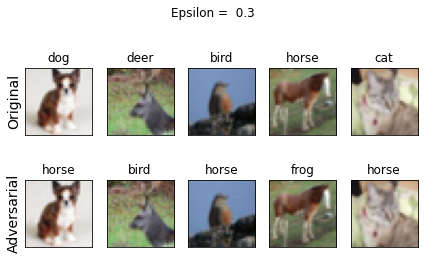

In [124]:
plt.figure(figsize=(2,12))
fig, axs = plt.subplots(2, 5)
fig.suptitle("Epsilon =  {}".format(0.3))
for j in range(len(ex_pgd)): 
  orig,noise,noise_ex,ori_ex = ex_noise[j]
  ax1 = axs[0, j]
  ax2 = axs[1, j]
  ax_imshow(ax2, noise_ex, noise)
  ax_imshow(ax1, ori_ex, orig)
  if j == 0:
    ax1.set_ylabel('Original', fontsize=14)
    ax2.set_ylabel('Adversarial', fontsize=14)
  plt.tight_layout()